<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Very_Deep_Convolutional_Networks_for_Large_Scale_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Very Deep Convolutional Networks for Large-Scale Image Recognition**

논문 링크: https://arxiv.org/abs/1409.1556

데이터셋: http://image-net.org/download

하지만 위의 데이터셋은 다운로드 시간이 3~5일이 걸리기 때문에 STL10 데이터셋을 가져오도록 했다.



VGGNet은 옥스포드 대학의 연구팀 VGG에 의해 개발된 모델로써, **2014년에 개최된 ILSVRC(ImageNet Large Scale Visual Recognition Challenge)에서 준우승**을 차지한 신경망(CNN) 구조이다.

## **VGGNet 구조**

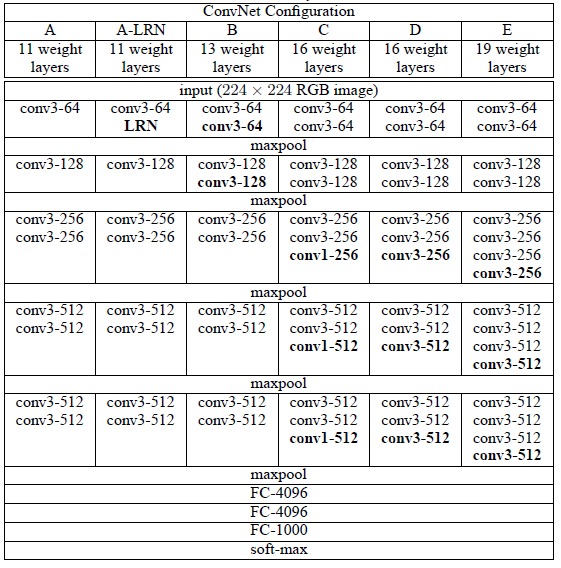

In [ ]:
import torch
import torch.nn as nn  

VGG_types = {
    # VGG11
    "VGG-A": [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    # VGG11 LRN
    "VGG-A-LRN": [64, "L", "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    # VGG13
    "VGG-B": [64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    # VGG16
    "VGG-D": [64, 64, "M", 128, 128, "M", 256, 256, 256, "M", 512, 512, 512, "M", 512, 512, 512, "M"],
    # VGG19
    "VGG-E": [64, 64, "M", 128, 128, "M", 256, 256, 256, 256, "M", 512, 512, 512, 512, "M", 512, 512, 512, 512, "M"],
}

## VGGNet
class VGGNet(nn.Module):
    def __init__(self, in_channels=3, num_classes=1000):
        super(VGGNet, self).__init__()
        self.in_channels = in_channels
        self.conv_layers = self.create_conv_layers(VGG_types["VGG-A-LRN"])

        self.fc = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc(x)
        return x

    def create_conv_layers(self, architecture):
        layers = []
        in_channels = self.in_channels

        for x in architecture:
            # Convolution Layer
            if type(x) == int:
                out_channels = x

                layers += [
                    nn.Conv2d(
                        in_channels=in_channels,
                        out_channels=out_channels,
                        kernel_size=(3, 3),
                        stride=(1, 1),
                        padding=(1, 1),
                    ),
                    nn.BatchNorm2d(x),
                    nn.ReLU(),
                ]

                in_channels = x
            # MaxPool
            elif x == "M":
                layers += [nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))]
            # Local Response Normalization
            elif x == "L":
                layers += [nn.LocalResponseNorm(2)]

        return nn.Sequential(*layers)